## <p style="background-color:#34495E; font-family:newtimeroman; color:lightgray; font-size:120%; text-align:center; border-radius:20px 20px;width:950px;height:50px;line-height:50px;border-style:round;">Customer Segmentation Using RFM Analysis</p>

***What is RFM Analysis?***


RFM analysis is a data-driven customer behavior segmentation technique. RFM stands for recency, frequency, and monetary  value. RFM analysis is used to score our customers based on their Recency, Frequency, and Monetary values.

***RFM Metrics***

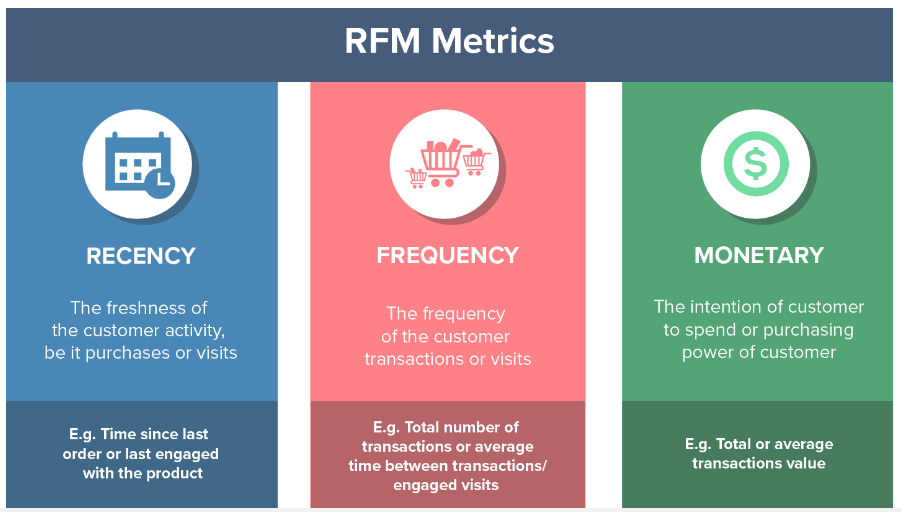

***

## <p style="background-color:seagreen; font-family:newtimeroman; color:lightgray; font-size:120%; text-align:center; border-radius:20px 20px;width:950px;height:50px;line-height:50px;border-style:round;">1. Data Exploration</p>

In [1]:
import numpy as np
import pandas as pd

#Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from yellowbrick.style import set_palette
set_palette('flatui')

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10,6)
# pd.set_option('display.max_columns', 100)
# pd.set_option('display.max_rows', 150)
# pd.set_option('display.float_format', '{:.3f}'.format)

In [2]:
df = pd.read_excel('Online Retail.xlsx')
print('Dataset Shape   :', df.shape)
print('Dataset Size    :', df.size)
print('Missing Values  :', df.isnull().sum().sum())
print('Duplicated Rows :', df.duplicated().sum())
print('Dtypes\t\t:', [tuple((x, y)) for x, y in df.dtypes.value_counts().items()])
df.head()

Dataset Shape   : (541909, 8)
Dataset Size    : 4335272
Missing Values  : 136534
Duplicated Rows : 5268
Dtypes		: [(dtype('O'), 4), (dtype('float64'), 2), (dtype('int64'), 1), (dtype('<M8[ns]'), 1)]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
df.isnull().sum()[df.isnull().sum()>0]

Description      1454
CustomerID     135080
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [6]:
# If the invoice number starts with the letter "C", it means the order was cancelled. Or those who abandon their order.
df.InvoiceNo.str.extract('^([A-Za-z]+)').value_counts()

C    9288
A       3
dtype: int64

In [7]:
df[(df.Quantity<0) & (df.InvoiceNo.str.startswith('C')==True)].shape[0]

9288

- Dataset has missing values and duplicate rows

- Quantity and UnitPrice columns have negative values

- negative values mean the order was canceled

***

## <p style="background-color:seagreen; font-family:newtimeroman; color:lightgray; font-size:120%; text-align:center; border-radius:20px 20px;width:950px;height:50px;line-height:50px;border-style:round;">2. Data Preparation</p>

***dropping missing values and duplicate rows***

In [8]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

***exclude negative values in Quantity and UnitPrice***

In [9]:
df = df[(df.UnitPrice > 0) & (df.Quantity > 0)].reset_index(drop=True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
392687,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
392688,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
392689,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
392690,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


***create a TotalPrice column***

In [10]:
df['TotalPrice'] = df.Quantity * df.UnitPrice
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


***

## <p style="background-color:seagreen; font-family:newtimeroman; color:lightgray; font-size:120%; text-align:center; border-radius:20px 20px;width:950px;height:50px;line-height:50px;border-style:round;">3. RFM Analysis</p>

In [11]:
pd.DataFrame([{'Customers': df['CustomerID'].nunique(),
               'Products': df['StockCode'].nunique(),
               'Transactions': df['InvoiceNo'].nunique()
              }], index=['Quantity'])

,Customers,Products,Transactions
Quantity,4338,3665,18532


***Choose a date as a point of reference to evaluate how many days ago was the customer's last purchase.***

In [12]:
print('First InvoiceDate :', df['InvoiceDate'].min(), '\nLast InvoiceDate  :', df['InvoiceDate'].max())

First InvoiceDate : 2010-12-01 08:26:00 
Last InvoiceDate  : 2011-12-09 12:50:00


In [13]:
reference_date = dt.datetime(2011,12,10)  #one day after last invoice date
reference_date

<IPython.core.display.Javascript object>

datetime.datetime(2011, 12, 10, 0, 0)

***RFM Dataframe***

- Recency: Days since last purchase
- Frequency: Number of purchases
- Monetary: Total amount of money spent

In [14]:
rfm = df.groupby('CustomerID').agg({
            'InvoiceDate': lambda day : (reference_date - day.max()).days,
            'InvoiceNo': lambda num : len(num),
            'TotalPrice': lambda price : price.sum()  
})

col_list = ['Recency','Frequency','Monetary']
rfm.columns = col_list
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,12,178.05


### Customer Segmentation

***Calculating RFM Scores***

In [15]:
rfm["R"] = pd.qcut(rfm["Recency"],5,labels=[5,4,3,2,1])
rfm["F"] = pd.qcut(rfm["Frequency"],5,labels=[1,2,3,4,5])
rfm["M"] = pd.qcut(rfm["Monetary"],5,labels=[1,2,3,4,5])

rfm["RFM_Score"] = rfm["R"].astype(str) +rfm["F"].astype(str) + rfm["M"].astype(str)

rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Score
CustomerID,,,,,,,
12346.0,325,1,77183.60,1,1,5,115
12347.0,2,182,4310.00,5,5,5,555
12348.0,75,31,1797.24,2,3,4,234
12349.0,18,73,1757.55,4,4,4,444
12350.0,310,17,334.40,1,2,2,122


***Customer Segmentation by Recency and Frequency***

In [16]:
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

In [17]:
rfm['Segment'] = rfm['R'].astype(str) + rfm['F'].astype(str)
rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment
CustomerID,,,,,,,,
12346.0,325,1,77183.60,1,1,5,115,Hibernating
12347.0,2,182,4310.00,5,5,5,555,Champions
12348.0,75,31,1797.24,2,3,4,234,At Risk
12349.0,18,73,1757.55,4,4,4,444,Loyal Customers
12350.0,310,17,334.40,1,2,2,122,Hibernating


Let’s group our dataset in order to see the average values of each segment.

In [18]:
rfm.groupby('Segment').mean().sort_values('Monetary')

,Recency,Frequency,Monetary
Segment,,,
Promising,22.437500,7.758929,429.433929
About to Sleep,52.176471,15.962848,449.729381
Hibernating,209.711111,13.644444,534.678317
Need Attention,52.044118,41.274510,836.859461
Potential Loyalists,15.629555,34.740891,908.291783
At Risk,163.743816,56.779152,1002.180636
Can't Loose,144.851852,179.592593,2399.085321
Loyal Customers,33.198286,154.979192,2840.622509
New Customers,6.421053,7.578947,3618.697018


### Plot RFM Segments

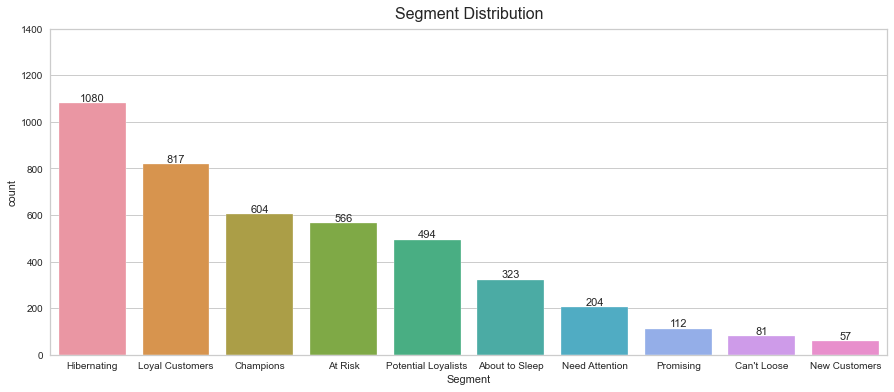

In [19]:
plt.figure(figsize=(15,6))
ax = sns.countplot(data=rfm, x='Segment', order=rfm.Segment.value_counts().index)
ax.bar_label(ax.containers[0], fontsize=11)
plt.ylim(0,1400)
plt.title('Segment Distribution', pad=10, fontsize=16);

In [20]:
rfm_plot = pd.DataFrame(rfm['Segment'].value_counts()).reset_index() \
                        .rename(columns={'index':'Segment', 'Segment':'Customers'})

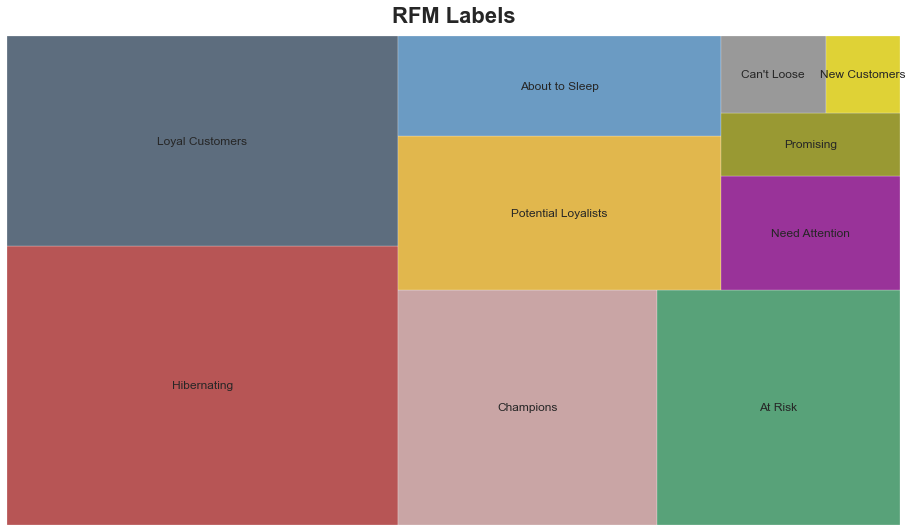

In [21]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)

color_list = ['brown','#34495E','rosybrown','seagreen','goldenrod','steelblue','purple','olive','gray','y']

squarify.plot(sizes=list(rfm_plot['Customers'].values), 
              label=list(rfm_plot['Segment'].values), alpha=0.8,
              text_kwargs={'fontsize':12}, color=color_list)
plt.title("RFM Labels", fontsize=22, fontweight="bold", pad=13)
plt.axis('off')
plt.show()